<p align="center">
  <img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" height=300px width=80%/>

  Image source: github.com/zalandoresearch/fashion-mnist
</p>

##Importing the libraries and dependencies

In [1]:
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
tf.__version__

'2.12.0'

## Preparing the dataset

### Loading the dataset from keras dataset library

In [3]:
#load the datasets
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### Splitting the data into train and validation set

In [4]:
#train and validation set
X_train, X_val, y_train,y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

###Normalise the images

Divide each image in the training , validation and testing set with the maxiumum number of pixels i.e. 255.

This is to ensure that each pixel is in the range [0, 1]. 

Also normalizing images helps the model to converge faster.

In [5]:
X_train_full = X_train_full/255.0

In [6]:
X_test = X_test/255.0

###Reshaping the dataset

reshape the input to be in a vector format, as is required by a fully connected network

In [7]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(48000, 784)

In [8]:
X_val = X_val.reshape(-1, 28*28)
X_val.shape

(12000, 784)

In [9]:
X_test = X_test.reshape(-2, 28*28)
X_test.shape

(10000, 784)

##Building an Artificial Neural Network

Step 1 : Defining the model

Step 2 : Adding the first layer (Dense layer)

Step 3 :  Adding a Dropout layer

Step 4 :  Adding the second layer (output layer)

**Defining the model** : 

Define an object of the Sequential model.

In [10]:
model = tf.keras.models.Sequential()

**Adding the first layer (Dense layer):**

Hyper-parameters used for the layer are:

number of units/neurons: 128

activation function: ReLU

input_shape: (784, )

In [11]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

**Adding a Dropout layer**

Dropout is a Regularization technique where the neurons in a layer are set to zero. 

In this way, while training those neurons won't be updated. 

This reduces the chance of overfitting of a network.

In [12]:
model.add(tf.keras.layers.Dropout(rate=0.40))
#dropout rate can be changed as needed

**Adding the second layer (output layer)**

no of units == number of output classes (10 in the case of Fashion MNIST)

activation function = 'softmax'(as it gives probability summing up to 1)

In [13]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

**Final Model after some trails**

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(rate=0.40))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.30))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

## Compile the model

**Optimizer**: Adam

**Loss**: Sparse categorical crossentropy - this is used when the number of classes to predict is more than two

In [15]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics= ['sparse_categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)               

###Plot the model

plot the model and export the image 

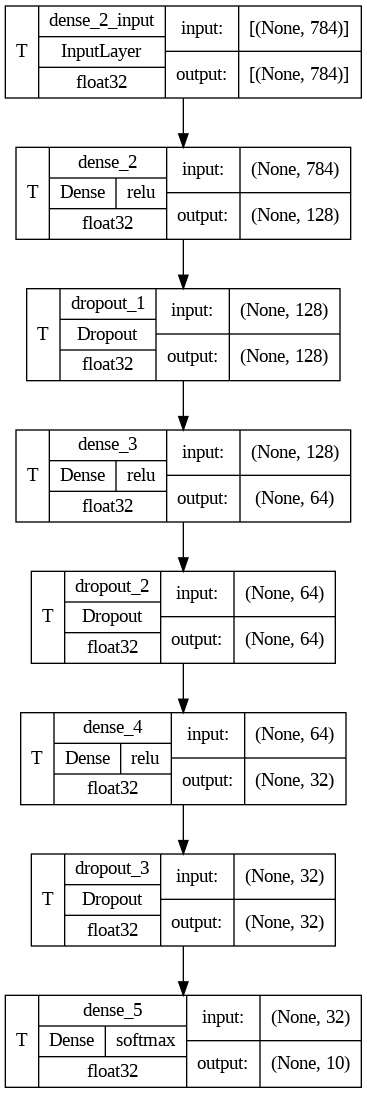

In [17]:
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_dtype=True,
                          show_layer_activations=True,
                          show_trainable=True)

## fit the model

training the model to learn from the image data

In [18]:
#train model
history = model.fit(X_train, y_train, epochs=50, validation_data=[X_val, y_val])

Epoch 1/50
1500/1500 [==============================] - 17s 10ms/step - loss: 3.5003 - sparse_categorical_accuracy: 0.1352 - val_loss: 2.1662 - val_sparse_categorical_accuracy: 0.1699
Epoch 2/50
1500/1500 [==============================] - 15s 10ms/step - loss: 2.2161 - sparse_categorical_accuracy: 0.1454 - val_loss: 2.1091 - val_sparse_categorical_accuracy: 0.1826
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 2.0242 - sparse_categorical_accuracy: 0.2081 - val_loss: 1.7272 - val_sparse_categorical_accuracy: 0.3019
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 1.7805 - sparse_categorical_accuracy: 0.2779 - val_loss: 1.5706 - val_sparse_categorical_accuracy: 0.3630
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 1.6655 - sparse_categorical_accuracy: 0.3198 - val_loss: 1.4027 - val_sparse_categorical_accuracy: 0.4451
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 1.5543 - 

## plot the metrics

In [19]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

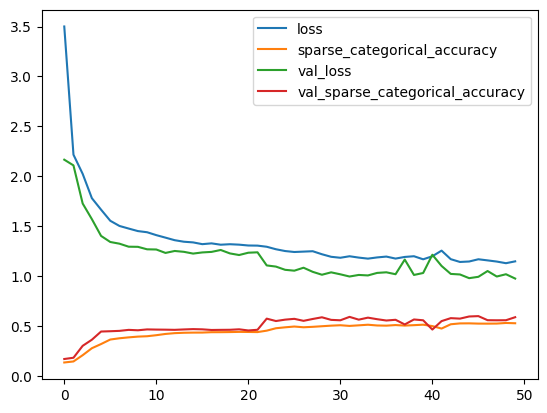

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
plt.show()

## Evaluate the model

Checking the accuracy of the model on test(unseen) set

In [21]:
#evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 2.4119 - sparse_categorical_accuracy: 0.1280


(2.411903142929077, 0.12800000607967377)

In [22]:
print("Test accuracy is : {}".format(test_accuracy))

Test accuracy is : 0.12800000607967377


## Save the model for deployment

Saving the architecture (topology) of the network

In [23]:
#save the model
model_json = model.to_json()
with open("fashin_model.json","w") as json_file:
  json_file.write(model_json)

Saving network weights

In [24]:
#save weights
model.save_weights("fashion_model.h5")